# Exploratory Data Analysis
In this notebook the COVID-19 data set is taken through some exploratory data analysis to identify first correlations and/or colinearities. A number of models will be tested for later application on the main question: whether there are population indicators that make a nation more vulderable to the virus than others.

In [3]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(os.getcwd())

/Users/lisahw/Documents/Courses and Conferences/DataScience/MyProject/Capstone_02/Springboard/notebooks


### Load the data

In [5]:
df_cov = pd.read_csv('../data/interim/COVID_base.csv') 
# this data frame contains COVID-19 and all population data for countries for which COVID-19 statistics exist
df_cov.drop(df_cov.columns[0],axis=1,inplace=True)
df_cov.head()

,Country,Confirmed,Deaths,Recovered,Active,Cardio Death Rate,Diabetes Percentage,Obesity,Undernourished,PopMale,PopFemale,PopTotal,Total Population
0,US,1309550,78795,0,1230755,0.151089,10.79,37.3,1.0,2.812048,3.923944,6.735992,329064.917
1,Canada,68918,4823,0,64095,0.105599,7.37,31.3,1.0,3.159014,4.289525,7.448540,37411.038
2,United Kingdom,216525,31662,1001,183862,0.122137,4.28,29.5,1.0,3.676556,4.856698,8.533254,67530.161
3,China,83990,4637,79127,226,0.261899,9.74,6.6,8.5,1.555179,2.048110,3.603289,1433783.692
4,Netherlands,42581,5441,149,36991,0.109361,5.29,23.1,1.0,3.546222,4.785875,8.332098,17097.123


### Check out typical characteristics

In [24]:
df_cov.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,147.0,26864.156463,115397.280543,8.000000,323.000000,1733.000000,10506.000000,1.309550e+06
Deaths,147.0,1894.163265,8034.918513,0.000000,8.000000,44.000000,302.000000,7.879500e+04
Recovered,147.0,7549.863946,22485.344459,0.000000,99.000000,658.000000,2759.500000,1.433000e+05
Active,147.0,17420.129252,103870.224005,0.000000,133.000000,613.000000,5101.500000,1.230755e+06
Cardio Death Rate,147.0,0.256981,0.119594,0.079370,0.162807,0.243811,0.324205,7.244167e-01
Diabetes Percentage,147.0,7.303469,3.760702,0.990000,4.800000,6.930000,9.030000,2.202000e+01
Obesity,147.0,18.534694,9.416538,2.100000,8.200000,21.900000,25.700000,3.730000e+01
Undernourished,147.0,10.653061,12.095308,1.000000,1.000000,6.500000,14.600000,5.960000e+01
PopMale,147.0,1.552883,1.258690,0.185446,0.461343,1.098134,2.546442,5.512896e+00
PopFemale,147.0,2.386105,2.062953,0.095829,0.663079,1.577732,3.994760,8.528817e+00


The COVID-19 data shows a high standard deviation with extreme maximum values beyond the 75-percentile. The percentages in cardio death rate, diabetes and obesity have a 50% standard deviation compared to the mean. Other characteristics, like undernourishment and population structure, again show a high variability between nations.

### Rewrite COVID-19 data as percentage of population 
Since all other values are relative to the population size, the COVID-19 statistics should be too.

In [25]:
print('The extreme outlier(s) is/are: ',(df_cov['Country'].loc[df_cov['Confirmed']>=0.75*np.max(df_cov['Confirmed'])].values[:]))

The extreme outlier(s) is/are:  ['US']


In [6]:
for key in ['Confirmed', 'Deaths','Recovered','Active']:
    df_cov[key] = df_cov[key]/df_cov['Total Population']/1000*100 # Total Population in Thousands and then transforming to percentage instead of fraction

In [27]:
df_cov.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,147.0,0.073584,0.118237,0.000117,0.003848,0.016204,0.101505,6.296591e-01
Deaths,147.0,0.004182,0.011031,0.000000,0.000105,0.000417,0.002382,7.436310e-02
Recovered,147.0,0.034488,0.081841,0.000000,0.001164,0.005465,0.028946,5.765514e-01
Active,147.0,0.034915,0.062073,0.000000,0.001494,0.007459,0.032140,3.740159e-01
Cardio Death Rate,147.0,0.256981,0.119594,0.079370,0.162807,0.243811,0.324205,7.244167e-01
Diabetes Percentage,147.0,7.303469,3.760702,0.990000,4.800000,6.930000,9.030000,2.202000e+01
Obesity,147.0,18.534694,9.416538,2.100000,8.200000,21.900000,25.700000,3.730000e+01
Undernourished,147.0,10.653061,12.095308,1.000000,1.000000,6.500000,14.600000,5.960000e+01
PopMale,147.0,1.552883,1.258690,0.185446,0.461343,1.098134,2.546442,5.512896e+00
PopFemale,147.0,2.386105,2.062953,0.095829,0.663079,1.577732,3.994760,8.528817e+00


In [180]:
import plotly.express as px
import plotly.graph_objects as go
import math
# bla = np.sort(df_park['Present'])
# plt.plot(bla,'.')
# plt.show()
def bubbleplot(df_park,cat_01,cat_02,title,title_cat_01,title_cat_02,yaxis_range=[0,7],legend='Clusters',x_axis_type='linear',y_axis_type='linear',cross_plot=None,annotate_arr=[]):
    sizeref = 1/4*max(df_park['GDP'])/(100**2)
    hover_text = []
    bubble_size = []
    if x_axis_type == 'log':
        title_cat_01 += ' (log)'
    if y_axis_type == 'log':
        title_cat_02 += ' (log)'

    for index, row in df_park.iterrows():
        hover_text.append(('Country: {Country}<br>'+
                          'Confirmed: {Con}<br>'+
                          'Total Population: {TotPop}<br>'+
                          'GDP: {GDP}<br>').format(Country=row['Country'],
                                                Con=int(row['Confirmed']),
                                                TotPop=int(row['Total Population']),
                                                GDP=int(row['GDP'])))
        bubble_size.append(math.sqrt(row['GDP']))
    df_park['text'] = hover_text
    df_park['size'] = bubble_size
    if legend == 'Clusters':
        present_bins = [str(cl) for cl in np.sort(df_park['Clusters'].unique())]  #['<500','<1000','<1500','<2000','<2500','>2500']
        present_data = {cat:df_park.query("Clusters == '%s'" %cat)
                                  for cat in present_bins} # Present_cat
        legend_title = 'Clusters'
    elif legend == 'Confirmed':
        present_bins = ['<500','<1000','<1500','<2000','<2500','>2500']
        present_data = {cat:df_park.query("Present_cat == '%s'" %cat)
                                  for cat in present_bins} # 
        legend_title = '# species (native & not-native)'

    # Create figure
    fig = go.Figure()

    for cat_name, cat in present_data.items():
        fig.add_trace(go.Scatter(
            x=cat[cat_01], y=cat[cat_02],
            name=cat_name, text=cat['text'],
            marker_size=cat['size'],
            ))

    fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                                  sizeref=sizeref, line_width=2))
    if cross_plot:
        fig.add_trace(go.Scatter(x=df_park[cat_01][cross_plot],y=df_park[cat_02][cross_plot],name='Endangered',mode='markers',marker=dict(color='black')))
    fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Bubble size: GDP',
            xanchor='right',
            x=9,
            xshift=0,
            yanchor='bottom',
            y=yaxis_range[0]+0.5,
            font=dict(
                size=12,
                color="dark gray"
            )
        )])
    for i in annotate_arr:
        print(df_park['Country'].iloc[i])
        fig.add_annotation(showarrow=True,
                text=df_park['Country'].iloc[i],
                x=np.log10(df_park[cat_01].iloc[i]),
                y=np.log10(df_park[cat_02].iloc[i]))
                
    fig.update_annotations(dict( xref="x",
                yref="y",
                arrowhead=7,
                ax=0,
                ay=-30))
                          
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
        title=title,
        title_x = 0.5,
        title_y = 0.85,
        xaxis=dict(
            title=title_cat_01,
            gridcolor='rgba(0.15,0.15,0.15,0.15)',
            gridwidth=1,
            type=x_axis_type,
        ),
        yaxis=dict(
            title=title_cat_02,
            gridcolor='rgba(0.15,0.15,0.15,0.15)',
            gridwidth=1,
            type=y_axis_type,
            range=yaxis_range
        ),
        legend=dict(title=legend_title)
    )
    fig.show()
    return fig;

In [39]:
df_GDP = pd.read_csv('../data/interim/COVID_base_GDP.csv',index_col=0)
bla = np.where(df_GDP['GDP'].isna())[0]
for i in bla:
    df_GDP['GDP'].iloc[i] = np.mean(df_GDP['GDP'].loc[df_GDP_2['Clusters']==df_GDP_2['Clusters'].iloc[i]])
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              147 non-null    object 
 1   Confirmed            147 non-null    int64  
 2   Deaths               147 non-null    int64  
 3   Recovered            147 non-null    int64  
 4   Active               147 non-null    int64  
 5   Cardio Death Rate    147 non-null    float64
 6   Diabetes Percentage  147 non-null    float64
 7   Obesity              147 non-null    float64
 8   Undernourished       147 non-null    float64
 9   PopMale              147 non-null    float64
 10  PopFemale            147 non-null    float64
 11  PopTotal             147 non-null    float64
 12  Total Population     147 non-null    float64
 13  GDP                  147 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory usage: 17.2+ KB


/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [230]:
df_clust = pd.read_csv('../data/interim/COVID_cluster.csv',index_col=0)
df_GDP_2 = pd.merge(left=df_GDP, right=df_clust.loc[:,['Country','Clusters']],on='Country')
df_GDP_2.loc[:,'Total Population'] = df_GDP_2['Total Population']*1000
df_GDP_2.describe()

,Confirmed,Deaths,Recovered,Active,Cardio Death Rate,Diabetes Percentage,Obesity,Undernourished,PopMale,PopFemale,PopTotal,Total Population,GDP,Clusters
count,1.470000e+02,147.000000,147.000000,1.470000e+02,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,1.470000e+02,147.000000,147.000000
mean,2.686416e+04,1894.163265,7549.863946,1.742013e+04,0.256981,7.303469,18.534694,10.653061,1.552883,2.386105,3.938988,4.980323e+07,18148.935396,0.918367
std,1.153973e+05,8034.918513,22485.344459,1.038702e+05,0.119594,3.760702,9.416538,12.095308,1.258690,2.062953,3.281700,1.672858e+08,17377.199147,0.772030
min,8.000000e+00,0.000000,0.000000,0.000000e+00,0.079370,0.990000,2.100000,1.000000,0.185446,0.095829,0.301110,1.105930e+05,661.239968,0.000000
25%,3.230000e+02,8.000000,99.000000,1.330000e+02,0.162807,4.800000,8.200000,1.000000,0.461343,0.663079,1.126508,4.226759e+06,4504.151006,0.000000
50%,1.733000e+03,44.000000,658.000000,6.130000e+02,0.243811,6.930000,21.900000,6.500000,1.098134,1.577732,2.678089,1.126308e+07,13111.213574,1.000000
75%,1.050600e+04,302.000000,2759.500000,5.101500e+03,0.324205,9.030000,25.700000,14.600000,2.546442,3.994760,6.688357,3.537015e+07,26792.862428,2.000000
max,1.309550e+06,78795.000000,143300.000000,1.230755e+06,0.724417,22.020000,37.300000,59.600000,5.512896,8.528817,14.041713,1.433784e+09,94277.965357,2.000000


In [277]:
cat_01 = 'Total Population'
title_cat_01 = cat_01
cat_02 = 'Deaths'
title_cat_02 = cat_02
annot_arr = []
for co in ['US','Ethiopia','Iceland','China','Mexico','Slovakia','Belgium']:
    annot_arr.append(np.where(df_GDP_2['Country']==co)[0][0])
title = '{} vs. {}'.format(cat_01,cat_02)
fig = bubbleplot(df_GDP_2,cat_01,cat_02,title,title_cat_01,title_cat_02,yaxis_range=[-0.5,5.5],legend='Clusters',x_axis_type='log',y_axis_type='log',cross_plot=None,annotate_arr=annot_arr)

US
Ethiopia
Iceland
China
Mexico
Slovakia
Belgium


### Plot the histogram

/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/lisahw/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/lisahw/anaconda3/lib/python3.7/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2fc7bc50>,
      dtype=object)

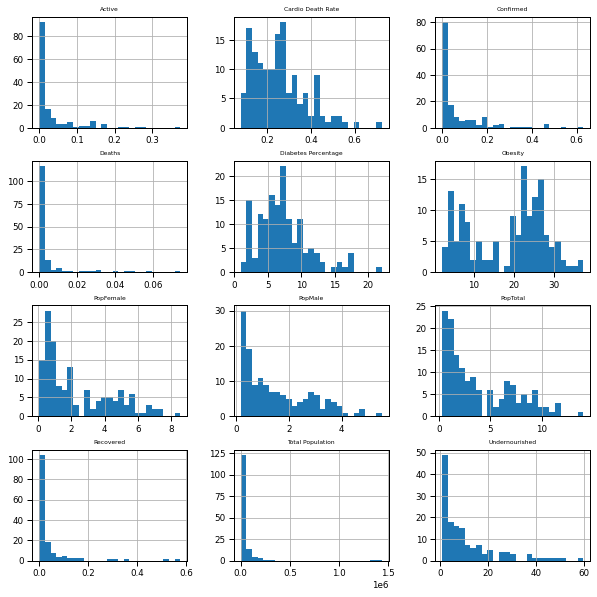

In [28]:
df_cov.hist(bins=25, figsize=(10,10))
plt.show()

Except for the percentage of diabetes patients, all other data seems to be Poisson-distributed. Population demographics could be covariant, which needs to be kept in mind for the modeling. Interestingly, Obesity shows two peaks.

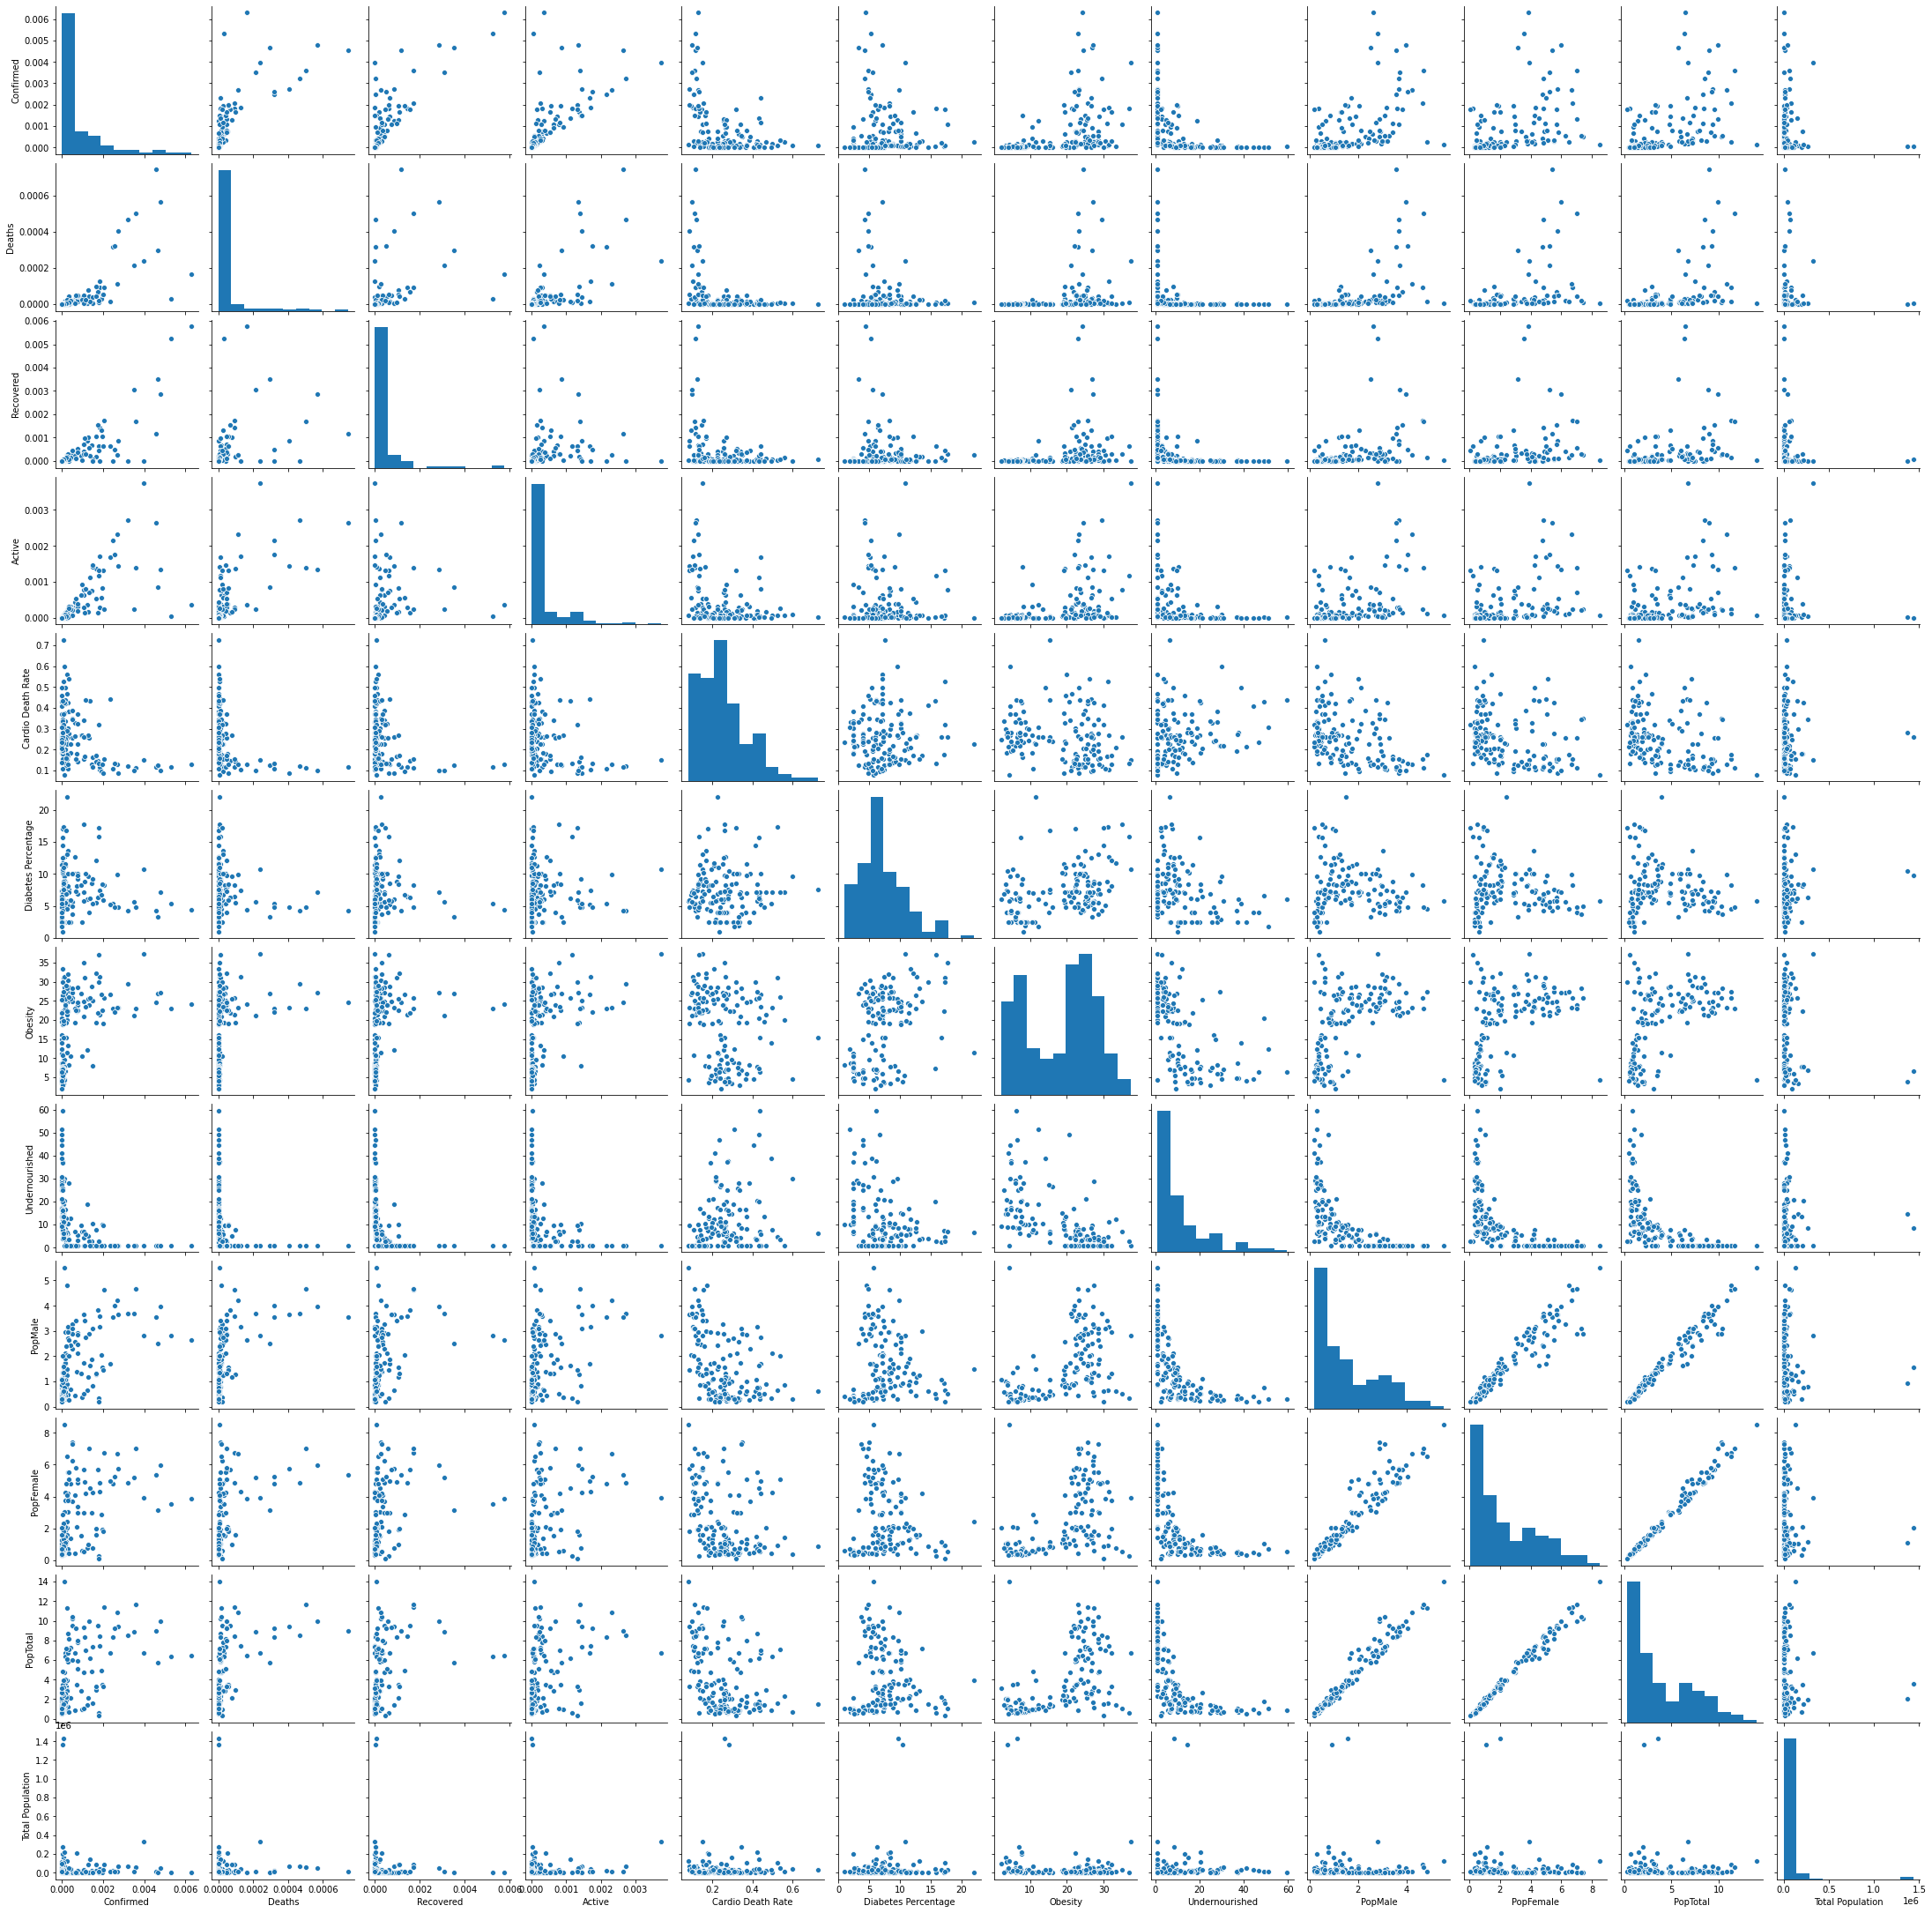

In [9]:
sns.pairplot(df_cov)

Before the division with the population, the pairplot showed an extreme outlier in the confirmed cases (US). This is now not as obvious anymore. Instead the COVID-19 numbers seem to correlate. Also, undernourishment shows an exponantial decrease. Furthermore, the population percentages are strongly correlated.

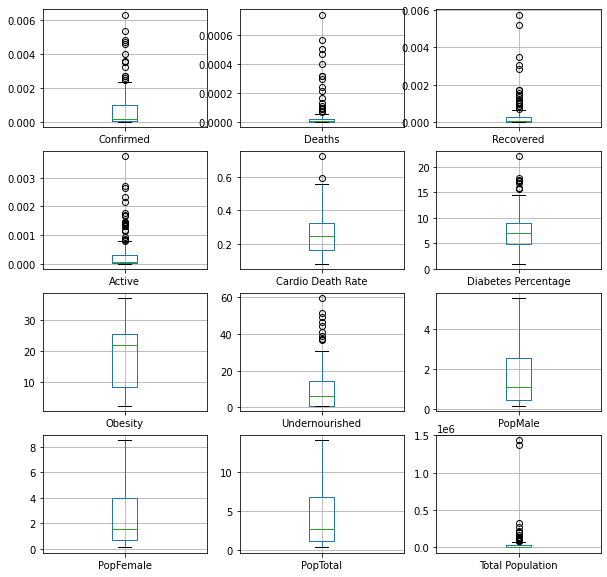

In [10]:
plt.figure(figsize=(10,10))
for key,k in zip(df_cov.columns,range(0,13)):
    if key == 'Country':
        continue
    plt.subplot(4,3,k)
    df_cov.boxplot(column=key)

The COVID-19 data has many outliers and it needs to be decided, whether the data should be cleaned from the outliers and if so how. First, the data should be clustered without covariant values like choosing only one of the COVID-19 indicators or excluding PopMale and PopFemale using only PopTotal.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

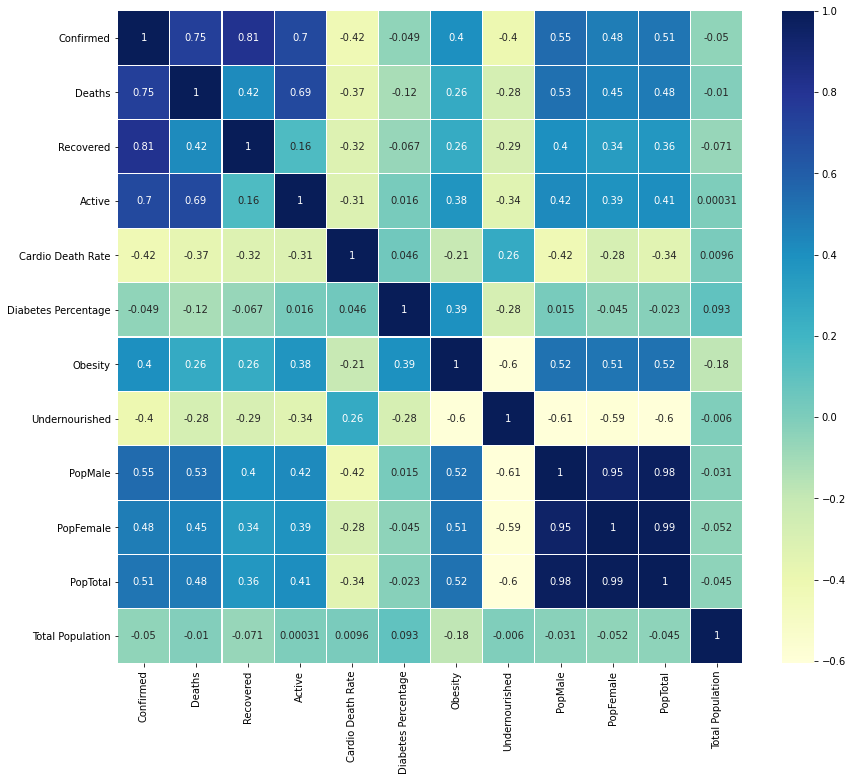

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(df_cov.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":5}) 
plt.yticks(rotation=0)

As seen above, the COVID-19 data set is in itself highly correlated. Also the population demographics. What becomes clear here is that the undernourishment courve is correlated to the demographics. This is most likely due to undernourishment being a negatively correlated indicator for wealth and health of a nation. And the healthier and richer a nation is, the higher becomes the proportion of older people in a population.

### Kernel density distribution

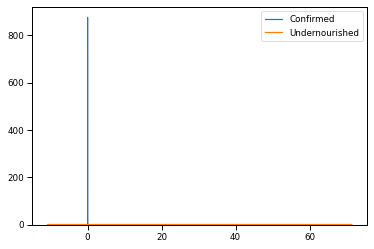

In [12]:
sns.kdeplot(df_cov.Confirmed)
sns.kdeplot(df_cov.Undernourished)

### Test the data set for clusters
1) First use the ellbow test to identify the needed number of clusters 

2) To do the ellbow test, use normalized data

3) Analyze the nature of the clusters in context of the COVID-19 data

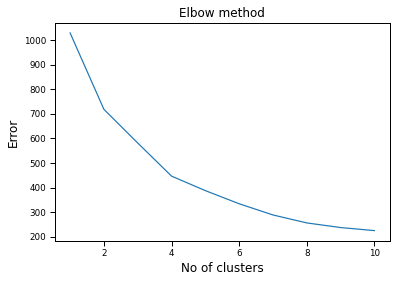

In [15]:
dftemp = df_cov.drop(columns=['Deaths','Recovered','Active','Country','PopMale','PopFemale'])#,'Clusters'])
# normalized_df=(dftemp-dftemp.min())/(dftemp.max()-dftemp.min())
# x = normalized_df.values #
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftemp.values)
# print(scaler.mean_)
normalized_df = scaler.transform(dftemp.values)
x = normalized_df
# normalized_df.head()


Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method',fontsize=12)
plt.xlabel('No of clusters',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.show()

(3, 7)


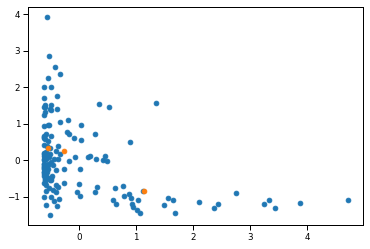

In [16]:
from sklearn.cluster import KMeans
# dftemp = df_cov.drop(columns=['Country','PopMale','PopFemale'])
# normalized_df=(dftemp-dftemp.min())/(dftemp.max()-dftemp.min())
# # normalized_df.head()
# x = normalized_df.values #
# x = dftemp.values
normalized_df = scaler.transform(dftemp.values)
x = normalized_df

kmeans = KMeans(n_clusters = 3).fit(x)
centroids = kmeans.cluster_centers_
print(centroids.shape)

plt.scatter(x[:,0],x[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1])

In [17]:
df_cov['Clusters'] = kmeans.predict(x)

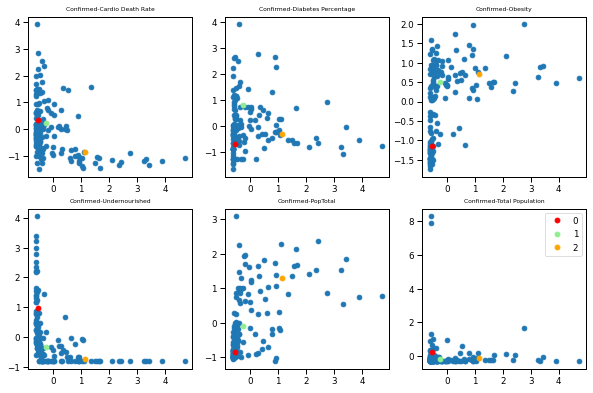

In [18]:
col = ['r','lightgreen','orange']
plt.figure(figsize=(10,10))
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.scatter(x[:,0],x[:,i])
    for j in range(3):
        plt.plot(centroids[j, 0], centroids[j, i],'o',color= col[j],label=str(j))
    plt.title('{}-{}'.format(dftemp.columns[0],dftemp.columns[i]))
plt.legend()

The clustering shows that for the confirmed cases, the cluster 0 and 2 are the most distinct. Cluster 2 incorporates the countries with the most cases.

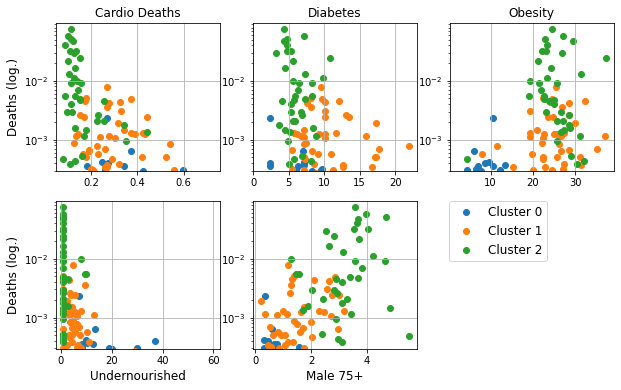

In [287]:
var = ['Cardio Death Rate', 'Diabetes', 'Obesity', 'Undernourished','Male 75+']
plt.figure(figsize=(10,6))
deaths = df_clust.Deaths.values
for i in range(1,6):
    plt.subplot(2,3,i)
    for j in range(3):
        clust = df_clust['Clusters'] == j
        plt.scatter(df_clust[var[i-1]].loc[clust].values,deaths[clust],label='Cluster '+str(j))
    if i in [1,4]:
        plt.ylabel('Deaths (log.)',fontsize=12)
    if var[i-1] == 'Male 75+':
        plt.xlabel('{}'.format('Male 75+'),fontsize=12)
        plt.legend(loc='upper left',bbox_to_anchor=[1.16,1.04],fontsize=12)
#     elif var[i-1] == 'Diabetes Percentage':
#         plt.title('{}'.format('Diabetes'))
    elif var[i-1] == 'Cardio Death Rate':
        plt.title('{}'.format('Cardio Deaths'))
    elif i <= 3:
        plt.title('{}'.format(var[i-1]))
    else:
        plt.xlabel('{}'.format(var[i-1]),fontsize=12)
    plt.gca().set_yscale('log')
    plt.grid()
plt.savefig('../reports/figures/Scatter_DeathsVsHealth_Demo.png')

In [233]:
cols = df_clust.columns.values
dic = {}
for i,char in zip([6,9,10,11],['Diabetes','Male 75+','Female 75+','Total 75+']):
    dic.update({cols[i]:char})
df_clust = df_clust.rename(dic,axis=1)
df_clust.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Cardio Death Rate', 'Diabetes', 'Obesity', 'Undernourished',
       'Male 75+', 'Female 75+', 'Total 75+', 'Total Population', 'Clusters'],
      dtype='object')

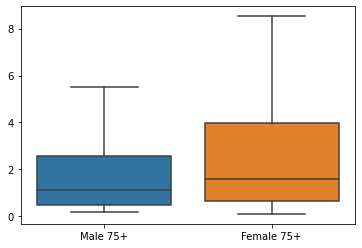

In [235]:
sns.boxplot(data=df_clust.loc[:,['Male 75+','Female 75+']])

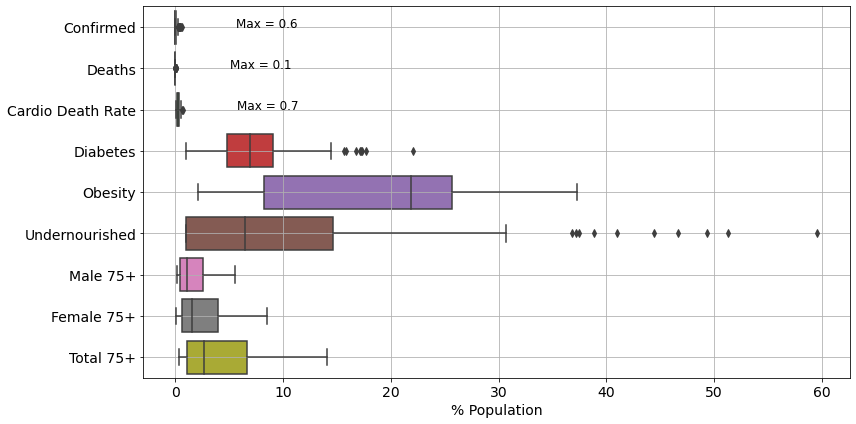

In [275]:
df_temp = df_clust.drop(['Country','Total Population','Recovered','Active','Clusters'],axis=1)
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df_temp,orient='h')
ax.set_yticklabels(df_temp.columns,fontsize=14)
ax.set_xticklabels(np.arange(-10,70,10),fontsize=14)
ax.set_xlabel('% Population',fontsize=14)
for i in range(3):
    xval = max(df_temp.iloc[:,i])
    ax.annotate('Max = {:.1f}'.format(xval),(xval+5,i),fontsize=12)
ax.grid()
plt.tight_layout()
plt.savefig('../reports/figures/boxplots_EDA.png')

In [276]:
df_temp.shape

(147, 9)

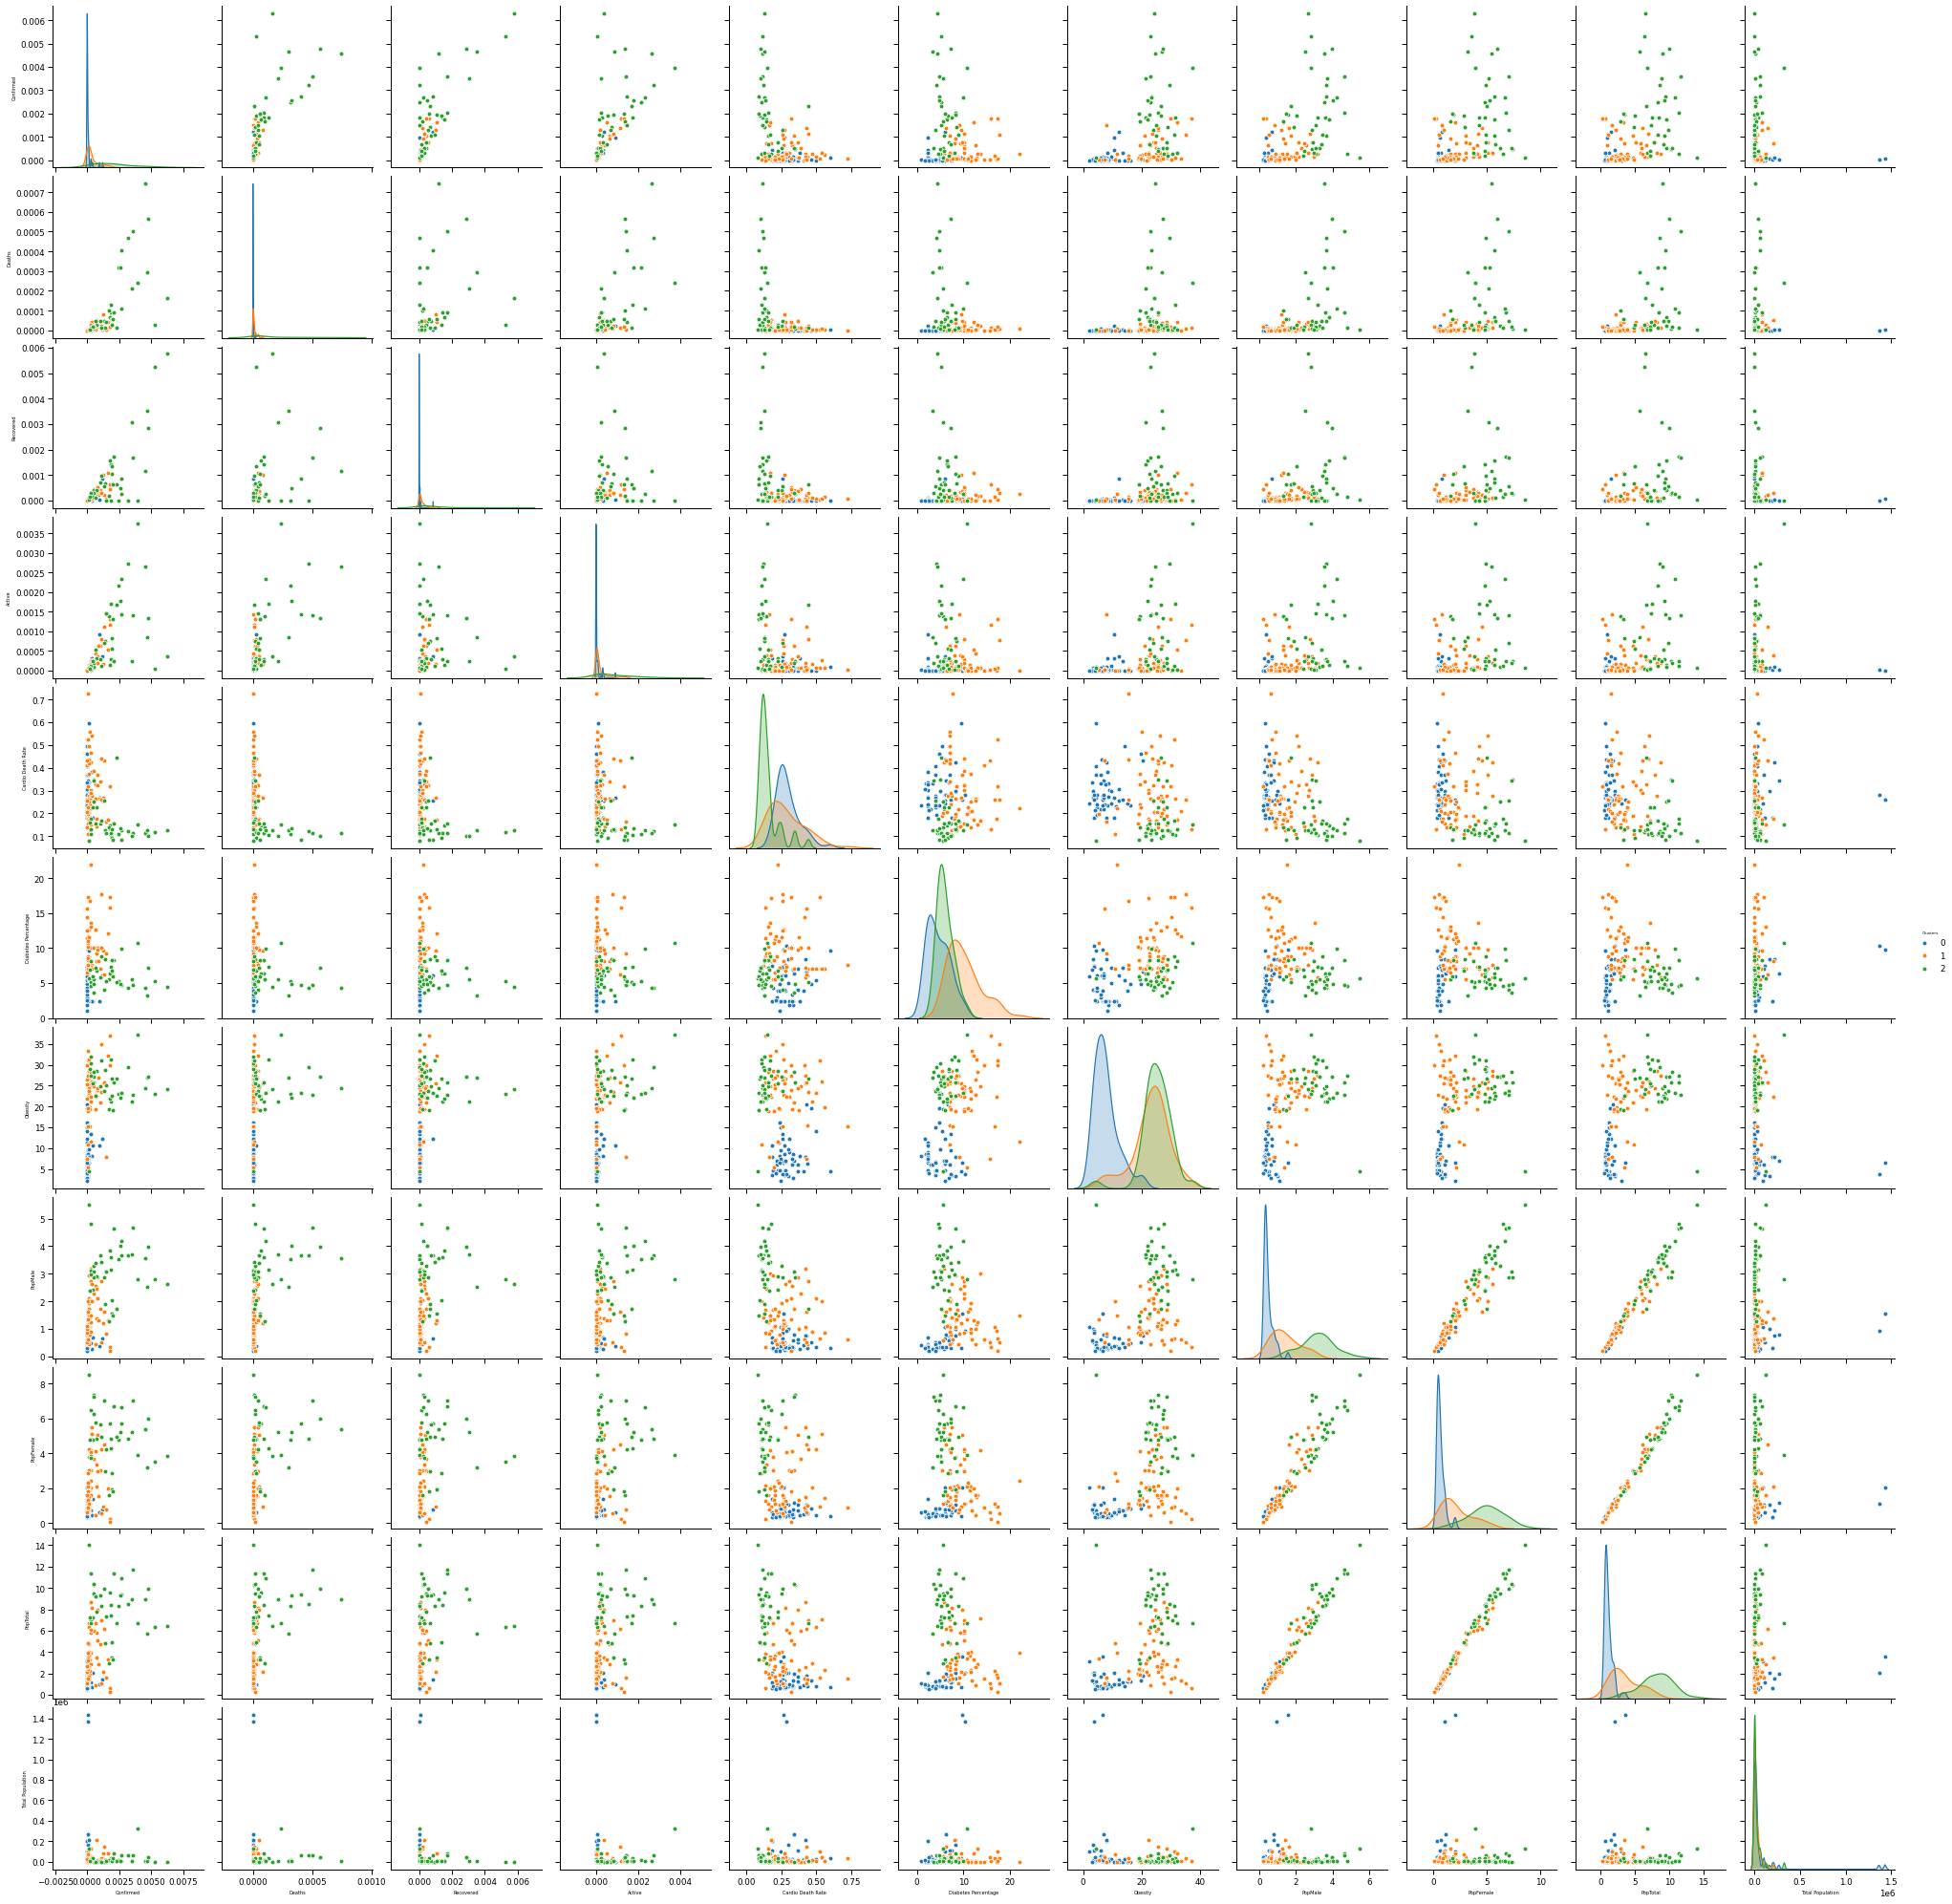

In [19]:
df_temp = df_cov.drop('Undernourished',axis=1)
sns.pairplot(df_temp,hue='Clusters')

The above graph shows that there is a likelihood that the response to COVID-19 might be a question of wealth. BUT, the data above is based on COVID-19 statistics from May 9, 2020. By now, COVID-19 has, unfortunately, spread also to less developed countries. It might therefore be interesting to compare statistics with more up-to date numbers.

### Save data including cluster

In [22]:
df_cov.to_csv('../data/interim/COVID_cluster.csv')